# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\sethh\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


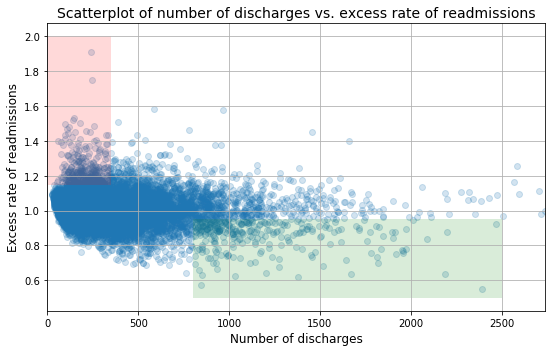

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
* AA. I disagree with the initial observation.  I don't see any obvious trends in the data besides being heavily grouped around excess readmission rate of 1.  No correlations are obvious.  Also none were tested statistically.  The comments made about the red and green shaded areas may be true, but were not tested either.  Also, the areas of the colored blocks seem arbitrary and uneven.  They also seem to focus on outlying data and leave the bulk of the data unaccounted for.


* AB. The statistics reported are just mean readmission rates and % number with readmission rates over 1 for two arbitrarily chosen groups less than 100 and greater than 1000.  I will check the stats below and the data:


In [5]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [7]:
#safe to drop all rows with null values for the column attributes Excess Readmission Ratio, Pred REad rate, and # of reads
#We only lose 81 of 11578 data points
clean_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio',
                                                 'Predicted Readmission Rate',
                                                 'Number of Readmissions'])
#recalculate stats reported in analysis
mean_100_df = clean_df[clean_df['Number of Discharges']<100]
mean_100 = mean_100_df['Excess Readmission Ratio'].mean()
read_per_100 = (mean_100_df[mean_100_df['Excess Readmission Ratio']>1].State.count()/len(mean_100_df.State))*100
print("The mean excess readmission rate for discharges less than 100 is {}.".format(round(mean_100,3)))
print("The percent of those hospitals with excess readmission rate greater than 1 is {}.".format(round(read_per_100,3)))

print('')

mean_1000_df = clean_df[clean_df['Number of Discharges']>1000]
mean_1000 = mean_1000_df['Excess Readmission Ratio'].mean()
read_per_1000 = (mean_1000_df[mean_1000_df['Excess Readmission Ratio']>1].State.count()/len(mean_1000_df.State))*100
print("The mean excess readmission rate for discharges less than 100 is {}.".format(round(mean_1000,3)))
print("The percent of those hospitals with excess readmission rate greater than 1 is {}.".format(round(read_per_1000,3)))

The mean excess readmission rate for discharges less than 100 is 1.023.
The percent of those hospitals with excess readmission rate greater than 1 is 63.215.

The mean excess readmission rate for discharges less than 100 is 0.978.
The percent of those hospitals with excess readmission rate greater than 1 is 44.492.


* Upon investigating the dataframe used to generate the statistics and plots.  It seems not all null values were handled.  Upon removing these nulls and running the stats in the analysis, I found that the stats check out.  Still no test was done to see if these results are significant, and they exclude a lot of data (data greater than 100 and less than 1000 discharges).  The results are real but no test was done for significance thus I can't say anything certain about them.


* AC. The significance of correlation or of means of the groups being different were never tested.  Thus, I can't agree with the conclusions drawn in the analysis.


* AD. Since I can't agree with the conclusions, I also have no confidence in the recommendations either.

***

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  $\alpha$  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
    * What are the advantages and disadvantages of using this plot to convey information?
    * Construct another plot that conveys the same information in a more direct manner.
    
***

* B1. Setup an appropriate hypothesis test.
    * I choose to setup a test for correlation between the Excess Rate of Readmissions and the Number of Discharges.  This will use all of the data and not bias to outlying groups.
    
        * The reason I chose to use correlation is so that I can see if there was any trend whatsoever that is significant in the data that could give an overall picture of the data.  A random permutation approach for correlation with the correlation coefficient as the test statistic is the best approach here to test whether the data is correlated or not.  Hacker statistics is powerful and widely applicable which is why I like to use it so much.
        
    * In addition I will also run a test to see if the proportion of having an Excessive Readmission Ratio greater than 1 is less likely in hospitals with high number of discharges.
    
        * I will employ hacker statistics and permutations here again to get a full feel of the distributions of the datasets in the high and low number of discharges groups.  By using permutations and testing difference in proportions I can test if the whole distributions of data are different vs. just if the means are different.
    
#### Test for Correlation
* B1. Setup an appropriate hypothesis test.
    * The null hypothesis is that the two attributes are not correlated.
    * I will utilize bootstrap testing to simulate many cases by holding the Excess Rate of Readmissions constant and permutating the Number of Discharges data repeatedly.
    * The test statistic will be the Pearson R correlation coefficient between the two attributes.
    * The p-value will be calculated by taking the sum of the cases in the bootstrap replicates that have pearson correlation at least as extreme as the empirical data divided by the number of replicates.
    

* B2. Compute and report the observed significance value (or p-value).

The empirical correlation coefficient is -0.097.

The 99% confidence interval is -0.023924447458500135 to 0.023918360795343686.
p-val = 0.0


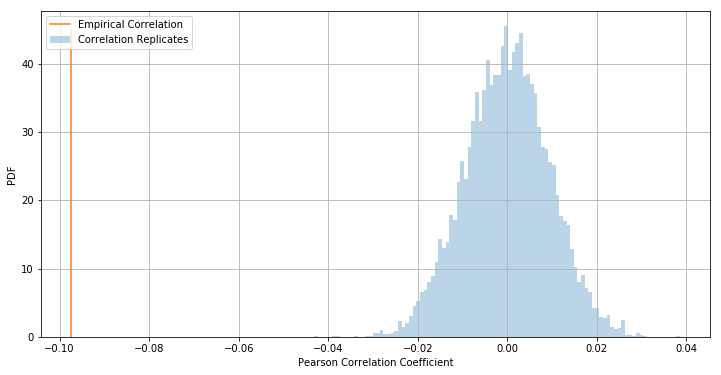

In [35]:
from scipy import stats
#calculate the empirical correlation
err = clean_df['Excess Readmission Ratio']
discharges = clean_df['Number of Discharges']

emp_corr = np.corrcoef(err, discharges)[0][1]
size = 10000

print("The empirical correlation coefficient is {}.".format(round(emp_corr,3)))
print("")

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(size)

# Draw replicates
for i in range(size):
    # Permute illiteracy measurments: illiteracy_permuted
    err_permuted = np.random.permutation(err)

    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(err_permuted,discharges)[0][1]

# Compute p-value: p
p = np.sum(perm_replicates <= emp_corr)/len(perm_replicates)
print("The 99% confidence interval is {} to {}.".format(np.percentile(perm_replicates,0.5),np.percentile(perm_replicates,99.5)))
print('p-val =', p)

#make a histogram of the replicate correlations and show where the empirical result lies
plt.figure(figsize=(12,6))
pd.Series(perm_replicates).hist(alpha=0.3, normed=True, bins=100)
plt.plot([emp_corr,emp_corr], [0,45])
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('PDF')
plt.legend(['Empirical Correlation','Correlation Replicates'], loc='upper left')
plt.show()

* B3. Report statistical significance for  $\alpha$  = .01.
    * The p-value is 0 for 10000 replicates, which means that in 10000 cases there wasn't one that had a correlation as extreme as the empirical case.  This p < 0.0001 and much less than 0.01.  So, the test result is statistically significant at the 0.01 significance level.  We can reject the null hypothesis that there isn't correlation present.
    
* B4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
    * The correlation is statisically significant in that Excess Readmission Ratio and Number of Discharges are negatively correlated, but only slightly.  Pratically, this difference is small and I wouldn't immediately start shutting down smaller hospitals based solely on the discharge rate.  More investigation needs to be done into the areas, types of patients, etc. that are in smaller hospital areas.  There is most likely a larger correlation with some other factor or factors to Excess Readmission Ratio.  Moreover, one can look at the hospitals with higher discharge rates to see their treatment methods and adjust the smaller hospitals to increase there discharge rates.  In addition, discharge rate shouldn't be the sole signifier of the capacity of a hospital.  The capacity of a hospital should be judged on its actual capacity.
    
* B5. Look at the scatterplot above.
    * What are the advantages and disadvantages of using this plot to convey information?
    * Construct another plot that conveys the same information in a more direct manner.
    
        * The plot is highly misleading and confusing no easily drawn conclusions can come from it at first glance.  Moreover, it only deals with the outlier data in it's judgements (shaded areas).  Advantages of the shaded areas is it draws attention to the point that is trying to be made.  You can see there are more low points in the green area and more high points in the red area.  But the fact that the graph was made based on bad statistics is still present.
        * The plot above shows the distribution of the correlations.  This shows the correlations that could happen by chance.  The line plotted shows that the empirical correlation found in the real data is way outside of the distribution of correlations.  This suggests that the empirical correlation is statistically significant.


#### Test for Excessive Readmissions Ratio Difference between Hospitals with Low and High Number of Discharges
* B1. Setup an appropriate hypothesis test. 
    * First, look at the summary statistics for the Excessive Readmissions Ratio and Number of Discharges to find a good number to split the data into groups.
    * The null hypothesis will be that there isn't a difference in the proportions of Excessive Readmission Ratio greater than 1 is not different between the hospitals with low and high number of discharges.
    * Then, I will generate many permutation replicates of the readmission ratio data and randomly divide them into the groups.
    * Next, the test statistic will be difference in proportions.
    * The p-value will be calculated by taking the sum of the replicates with a test statistic at least as extreme as the empirical case divided by the amount of replicates.
    
* B2. Compute and report the observed significance value (or p-value).

In [26]:
#first find the groups for high and low number of discharges
clean_df['Number of Discharges'].describe()

count    11497.000000
mean       365.466209
std        308.754590
min         25.000000
25%        160.000000
50%        282.000000
75%        474.000000
max       6793.000000
Name: Number of Discharges, dtype: float64

* Upon looking at the data, the data is right skewed with the mean greater than median for the number of discharges, so I will use the meadian as the dividing point between low and high number of discharges (282).  This will also split the data in half.

The proportion of Excess Readmission Ratio > 1 in hospitals with low number of discharges is 0.5382741823242867.

The proportion of Excess Readmission Ratio > 1 in hospitals with high number of discharges is 0.49486867281266306.

The empirical difference of proportions is 0.04340550951162364.

The 99% confidence interval is -0.024438276336945397 to 0.024965916434833035.
p-val = 0.0001


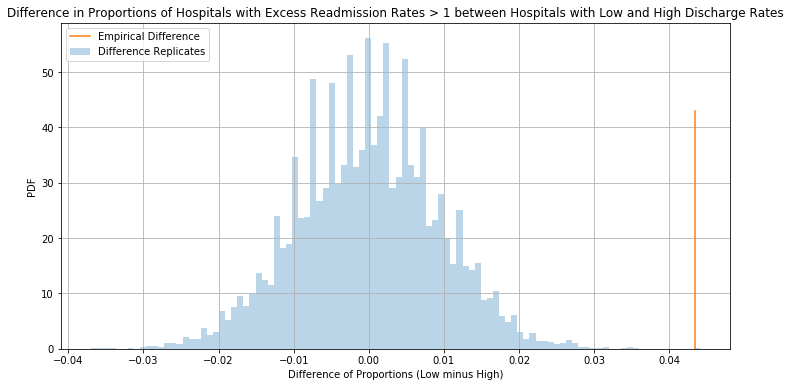

In [37]:
from IPython.core.debugger import set_trace

def diff_of_props(data1,data2):
    """Generates difference in proportions of greater than 1 of two datasets."""
    prop1 = np.sum(data1>1)/len(data1)
    prop2 = np.sum(data2>1)/len(data2)
    return prop1 - prop2
    
def perm_rep_draw(data1,data2,func,size):
    """Generates permutation replicates of desired size and function."""
    
    # Initialize permutation replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    #Concatenate data
    cat_data = np.concatenate((data1,data2))

    # Draw replicates
    for i in range(size):
        
        # Permute data and split into sets
        perm_data = np.random.permutation(cat_data)
        low = perm_data[:len(data1)]
        high = perm_data[len(data1):]

        # Compute replicate with function from data low and high
        perm_replicates[i] = func(low,high)
    return perm_replicates
        
#set up test parameters
low_df = clean_df.loc[clean_df['Number of Discharges']<282,['Excess Readmission Ratio','Number of Discharges']]
high_df = clean_df.loc[clean_df['Number of Discharges']>=282,['Excess Readmission Ratio','Number of Discharges']] 

#empirical difference of proportions
emp_diff_prop = diff_of_props(low_df['Excess Readmission Ratio'], high_df['Excess Readmission Ratio'])
print("The proportion of Excess Readmission Ratio > 1 in hospitals with low number of discharges is {}."
      .format(np.sum(low_df['Excess Readmission Ratio']>1)/len(low_df.iloc[:,0])))
print('')
print("The proportion of Excess Readmission Ratio > 1 in hospitals with high number of discharges is {}."
      .format(np.sum(high_df['Excess Readmission Ratio']>1)/len(high_df.iloc[:,0])))
print('')
print('The empirical difference of proportions is {}.'.format(emp_diff_prop))
print('')
        
#generate the replicates
perm_replicates = perm_rep_draw(low_df.iloc[:,0], high_df.iloc[:,0], diff_of_props, 10000)
        
# Compute p-value: p
p = np.sum(perm_replicates >= emp_diff_prop)/len(perm_replicates)
print("The 99% confidence interval is {} to {}.".format(np.percentile(perm_replicates,0.5),np.percentile(perm_replicates,99.5)))
print('p-val =', p)

#make a histogram of the replicate correlations and show where the empirical result lies
plt.figure(figsize=(12,6))
pd.Series(perm_replicates).hist(alpha=0.3, normed=True, bins=100)
plt.plot([emp_diff_prop,emp_diff_prop], [0,43])
plt.title('Difference in Proportions of Hospitals with Excess Readmission Rates > 1 between Hospitals with Low and High Discharge Rates')
plt.ylabel('PDF')
plt.xlabel('Difference of Proportions (Low minus High)')
plt.legend(['Empirical Difference','Difference Replicates'], loc='upper left')
plt.show()

* B3. Report statistical significance for  $\alpha$  = .01.
    * The p-value is 0.0001 for 10000 replicates, which means that in 10000 cases there was one that had a correlation as extreme as the empirical case.  This p = 0.0001 is much less than 0.01.  So, the test result is statistically significant at the 0.01 significance level.  We can reject the null hypothesis that the difference in proportions of excess readmission ratios > 1 is 0 between hospitals with low discharge rates (less than 282) and high discharge rates (greater than 282).
    
* B4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
    * The difference is statisically significant in that Excess Readmission Ratios do occur more often in hospitals with lower discharge rates (boundary set at the median discharge rate).  Pratically, this difference is somewhat substantial being 5%.  However, I wouldn't immediately start shutting down smaller hospitals based solely on the discharge rate.  More investigation needs to be done into the areas, types of patients, etc. that are in smaller hospital areas.  There is most likely a larger correlation with some other factor or factors to Excess Readmission Ratio.  Moreover, one can look at the hospitals with higher discharge rates to see their treatment methods and adjust the smaller hospitals to increase there discharge rates.  In addition, discharge rate shouldn't be the sole signifier of the capacity of a hospital.  The capacity of a hospital should be judged on its actual capacity.
    
* B5. Look at the scatterplot above.
    * What are the advantages and disadvantages of using this plot to convey information?
    * Construct another plot that conveys the same information in a more direct manner.
    
        * The plot is highly misleading and confusing no easily drawn conclusions can come from it at first glance.  Moreover, it only deals with the outlier data in it's judgements (shaded areas).  Advantages of the shaded areas is it draws attention to the point that is trying to be made.  You can see there are more low points in the green area and more high points in the red area.  But the fact that the graph was made based on bad statistics is still present.
        * The plot above shows the distribution of the difference of proportions.  This shows the differences that could happen by chance.  The line plotted shows that the empirical difference found in the real data is outside of the distribution of differences.  This visually suggests that the empirical difference is statistically significant.

* Being that the excess readmission ratio data seems mostly normal, I decided to do a t test for difference in means between the low and high number of discharge groups.  The test gives the same results as the previous tests suggesting that the empirical difference of means between hospitals with low and high discharge rates is statistically significant within a significance level of 0.01.

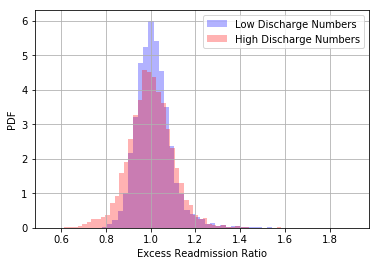

Ttest_indResult(statistic=8.1859675449591531, pvalue=2.9976590353451099e-16)


In [21]:
#plot histograms of low and high datasets and run t test
low_df['Excess Readmission Ratio'].hist(color='blue',alpha=.3,normed=True, bins=50)
high_df['Excess Readmission Ratio'].hist(color='red',alpha=.3,normed=True, bins=50)
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('PDF')
plt.legend(['Low Discharge Numbers','High Discharge Numbers'],loc='upper right')
plt.show()

print(stats.ttest_ind(low_df['Excess Readmission Ratio'], high_df['Excess Readmission Ratio'], equal_var=False))

* The difference of means and proportions between low and high discharge rates will most likely grow as the cutoff region changes for what constitutes low and high discharge rates.  This must be done carefully as the more you separate the low and high cutoff the less data you are using and the more emphasis is put on the outliers in the statistical testing.